In [1]:
# check the receiver and donor
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dbd = pd.read_csv("$PATH/smetana.donor.csv",index_col=0)
dbr = pd.read_csv("$PATH/smetana.receiver.csv",index_col=0)

In [9]:
with open("$PATH/tetnumber") as f:
    tet = f.readlines()
tet = [i[:-2] for i in tet]
with open("$PATH/accnumber") as f:
    acc = f.readlines()
acc = [i[:-2] for i in acc]

In [10]:
def add_tax(db,kw,acc):
    tax = db[kw].str.contains("|".join(acc) + "|Accu")
    tax[tax==True] = "Acc"
    tax[tax==False] = "Tet"
    tax.name = 'taxonomy'
    new = pd.concat([db,tax],axis=1)
    return new
dbr = add_tax(dbr,'donor',acc) # # added taxonomy info
dbd = add_tax(dbd,'receiver',acc) # added taxonomy info

In [11]:
dbr

,community,medium,receiver,donor,compound,scs,mus,mps,smetana,compound2,fullname,taxonomy
0,all,minimal,bin0,Accu,M_diact_e,0.04,0.02,1,0.0008,diact,Diacetyl C4H6O2,Acc
1,all,minimal,bin0,Accu,M_diact_e,0.04,0.02,1,0.0008,diact,Diacetyl C4H6O2,Acc
2,all,minimal,bin0,Accu,M_etoh_e,0.04,0.30,1,0.0120,etoh,Ethanol,Acc
3,all,minimal,bin0,Accu,M_etoh_e,0.04,0.30,1,0.0120,etoh,Ethanol,Acc
4,all,minimal,bin0,Accu,M_etoh_e,0.04,0.30,1,0.0120,etoh,Ethanol,Acc
...,...,...,...,...,...,...,...,...,...,...,...,...
1896,all,minimal,bin0,GCA_000585095.1.cds.faa,M_h_e,0.02,0.27,1,0.0054,h,H+,Acc
1897,all,minimal,bin0,GCA_000585095.1.cds.faa,M_h_e,0.02,0.27,1,0.0054,h,H+,Acc
1898,all,minimal,bin0,GCA_000585095.1.cds.faa,M_h_e,0.02,0.27,1,0.0054,h,H+,Acc
1899,all,minimal,bin0,GCA_000585095.1.cds.faa,M_h_e,0.02,0.27,1,0.0054,h,H+,Acc


In [12]:
dbd

,community,medium,receiver,donor,compound,scs,mus,mps,smetana,compound2,fullname,taxonomy
1901,all,minimal,Accu,bin0,M_acald_e,0.100000,0.01,1,0.001000,acald,Acetaldehyde,Acc
1902,all,minimal,Accu,bin0,M_acald_e,0.100000,0.01,1,0.001000,acald,Acetaldehyde,Acc
1903,all,minimal,Accu,bin0,M_acald_e,0.100000,0.01,1,0.001000,acald,Acetaldehyde,Acc
1904,all,minimal,Accu,bin0,M_acald_e,0.100000,0.01,1,0.001000,acald,Acetaldehyde,Acc
1905,all,minimal,Accu,bin0,M_acald_e,0.100000,0.01,1,0.001000,acald,Acetaldehyde,Acc
...,...,...,...,...,...,...,...,...,...,...,...,...
58366,all,minimal,GCA_000585095.1.cds.faa,bin0,M_h_e,0.033333,0.05,1,0.001667,h,H+,Acc
58367,all,minimal,GCA_000585095.1.cds.faa,bin0,M_h_e,0.033333,0.05,1,0.001667,h,H+,Acc
58368,all,minimal,GCA_000585095.1.cds.faa,bin0,M_h_e,0.033333,0.05,1,0.001667,h,H+,Acc
58369,all,minimal,GCA_000585095.1.cds.faa,bin0,M_h_e,0.033333,0.05,1,0.001667,h,H+,Acc


In [13]:
def get_stats(df,group=["fullname",'taxonomy']):
    mean = df.groupby(group).mean()
    std = df.groupby(group).std()
    count = df.groupby(group).count()['community'] 
    df = pd.concat([mean,std,count],axis=1).sort_values('community',ascending=False)
    return df

temp = get_stats(dbr)["community"]/get_stats(dbr)["community"].sum()
temp.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
unstack = temp.unstack(level=1)
unstack['ratio'] = unstack['Acc']/unstack['Tet']# received
selected1 = unstack.loc[['Iron (Fe3+)','L-Arginine','Phosphate'],:]# received molecule selected

In [16]:
temp = get_stats(dbd)["community"]/get_stats(dbd)["community"].sum()
temp.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
unstack2 = temp.unstack(level=1) # donor
unstack2['ratio'] = unstack2['Acc']/unstack2['Tet'] # donor

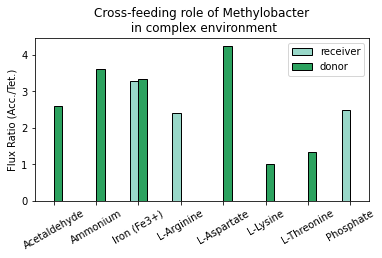

In [159]:
selected1 = unstack.loc[['Iron (Fe3+)','L-Arginine','Phosphate'],:]
selected1['receiver'] = selected1['ratio']
selected2 = unstack2.loc[['Ammonium','L-Aspartate','Acetaldehyde','Iron (Fe3+)','L-Lysine','L-Threonine'],:] # dissimilar
selected2['donor'] = selected2['ratio']
df_smetana = pd.concat([selected1['receiver'],selected2['donor']],axis=1)
fig, ax = plt.subplots(1,1,figsize=(6,3))
df_smetana.sort_index().plot(kind='bar',ax=ax,width=.4,edgecolor='k',color=['#99d8c9','#2ca25f'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='center')
ax.set_xlabel('')
ax.set_ylabel('Flux Ratio (Acc./Tet.)')
ax.set_title("Cross-feeding role of Methylobacter\n in complex environment")
fig.savefig("NutrientExchange.png",bbox_inches='tight',dpi=600)